<h2>Влияние фазы на восприятие</h2>
<p>Проверим, существенна ли фаза в восприятии звукового сигнала.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd

Построим пилообразный сигнал:

In [ ]:
def generate_sawtooth_wave(frequency, duration=1, amplitude=1, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration))
    
    sig = amplitude * 2 * (t * frequency - np.floor(0.5 + t * frequency))
    
    return t, sig

In [3]:
def draw_signal(t, sig, sig_name):
    plt.figure(figsize=(10, 4))
    plt.plot(t, sig)
    plt.title(sig_name)
    plt.xlabel('Время (с)')
    plt.ylabel('Амплитуда')
    plt.grid(True)
    plt.show()

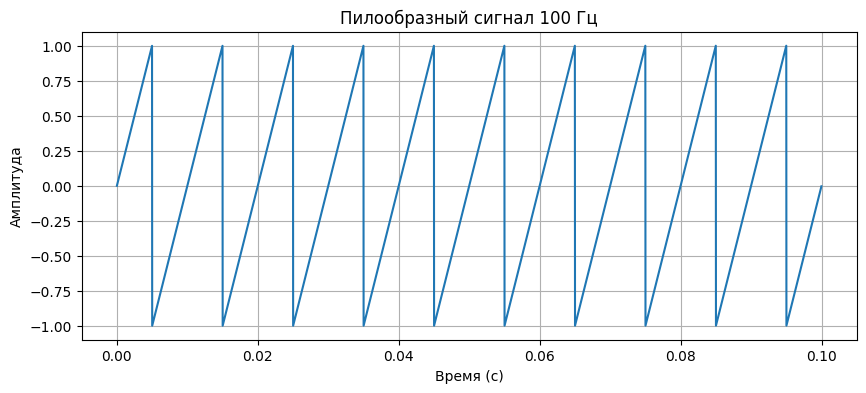

In [4]:
frequency=100
t, sig = generate_sawtooth_wave(frequency, duration=0.5, amplitude=1)
draw_signal(t[:len(sig)//5], sig[:len(sig)//5], f'Пилообразный сигнал {frequency} Гц')

In [5]:
ipd.Audio(data=sig, rate=44100)

Нарисуем амплитудный спектр пилообразного сигнала:

In [6]:
from scipy import fftpack

def plot_spectrum(signal, sample_rate, title="Амплитудный спектр сигнала"):
    """
    Рисует амплитудный спектр сигнала
    """
    n = len(signal)
    fft = fftpack.rfft(signal)
    
    # Вычисляем амплитуды и частоты
    amplitudes = np.abs(fft) / max(np.abs(fft))  # Нормализуем
    frequencies = fftpack.rfftfreq(n, 1/sample_rate)

    plt.plot(frequencies, amplitudes)
    plt.title(title)
    plt.xlabel("Частота (Гц)")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.xlim(0, 10000)  
    plt.show()
    
    return frequencies, amplitudes

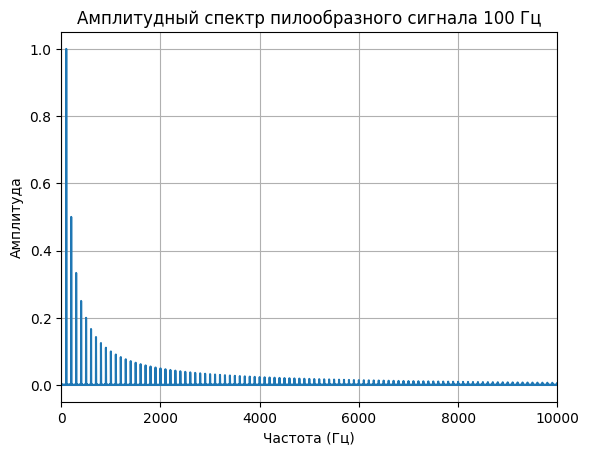

In [7]:
freq, amp = plot_spectrum(sig, sample_rate=44100, title=f"Амплитудный спектр пилообразного сигнала {frequency} Гц")

Нарисуем фазовый спектр:

In [8]:
def plot_phase_spectrum_with_amplitude_cutoff(signal, sample_rate, amplitude_threshold=0.01):
    
    n = len(signal)
    fft = fftpack.rfft(signal)
    
    # Вычисляем амплитуды, фазы и частоты
    amplitudes = np.abs(fft) / max(np.abs(fft))
    phases = np.angle(fft)  # Фазы в радианах
    frequencies = fftpack.rfftfreq(n, 1/sample_rate)
    
    # Применяем порог по амплитуде
    mask = amplitudes >= amplitude_threshold
    filtered_frequencies = frequencies[mask]
    filtered_phases = phases[mask]
    filtered_amplitudes = amplitudes[mask]
    
    plt.plot(filtered_frequencies, filtered_phases, 'o', 
             markersize=1)
    plt.title(f'Фазы для частот с амплитудой ≥ {amplitude_threshold}')
    plt.xlabel('Частота (Гц)')
    plt.ylabel('Фаза (радианы)')
    plt.grid(True)
    plt.show()
    
    return filtered_frequencies, filtered_phases, filtered_amplitudes

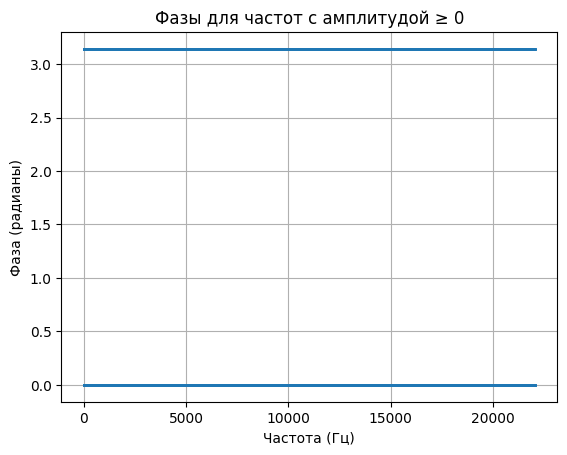

In [9]:
freq, phases, amps = plot_phase_spectrum_with_amplitude_cutoff(
    sig, sample_rate=44100, amplitude_threshold=0
)

In [10]:
def plot_sig_ampl_and_phase_spectrum_with_amplitude_cutoff(signal, sample_rate, amplitude_threshold=0.01):
    
    n = len(signal)
    fft = fftpack.rfft(signal)
    
    # Вычисляем амплитуды, фазы и частоты
    amplitudes = np.abs(fft) / max(np.abs(fft))
    phases = np.angle(fft)  # Фазы в радианах
    frequencies = fftpack.rfftfreq(n, 1/sample_rate)
    
    # Применяем порог по амплитуде
    mask = amplitudes >= amplitude_threshold
    filtered_frequencies = frequencies[mask]
    filtered_phases = phases[mask]
    filtered_amplitudes = amplitudes[mask]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 6))

    # Сигнал
    ax1.plot(t[:2000], signal[:2000])
    ax1.set_title(f'Сигнал\n(первые 2000 отсчетов)')
    ax1.set_xlabel('Время (с)')
    ax1.grid(True)
        
    # Амплитудный спектр
    ax2.plot(filtered_frequencies, filtered_amplitudes)
    ax2.set_title('Амплитудный спектр')
    ax2.set_xlabel('Частота (Гц)')
    ax2.set_xlim(0, 10000)  
    ax2.grid(True)
        
    # Фазовый спектр
    ax3.plot(filtered_frequencies, filtered_phases, 'o', 
             markersize=1)
    ax3.set_title('Фазовый спектр')
    ax3.set_xlabel('Частота (Гц)')
    ax3.set_ylabel('Фаза (радианы)')
    ax3.grid(True)

    plt.tight_layout()
    plt.show()
    
    return filtered_frequencies, filtered_phases, filtered_amplitudes

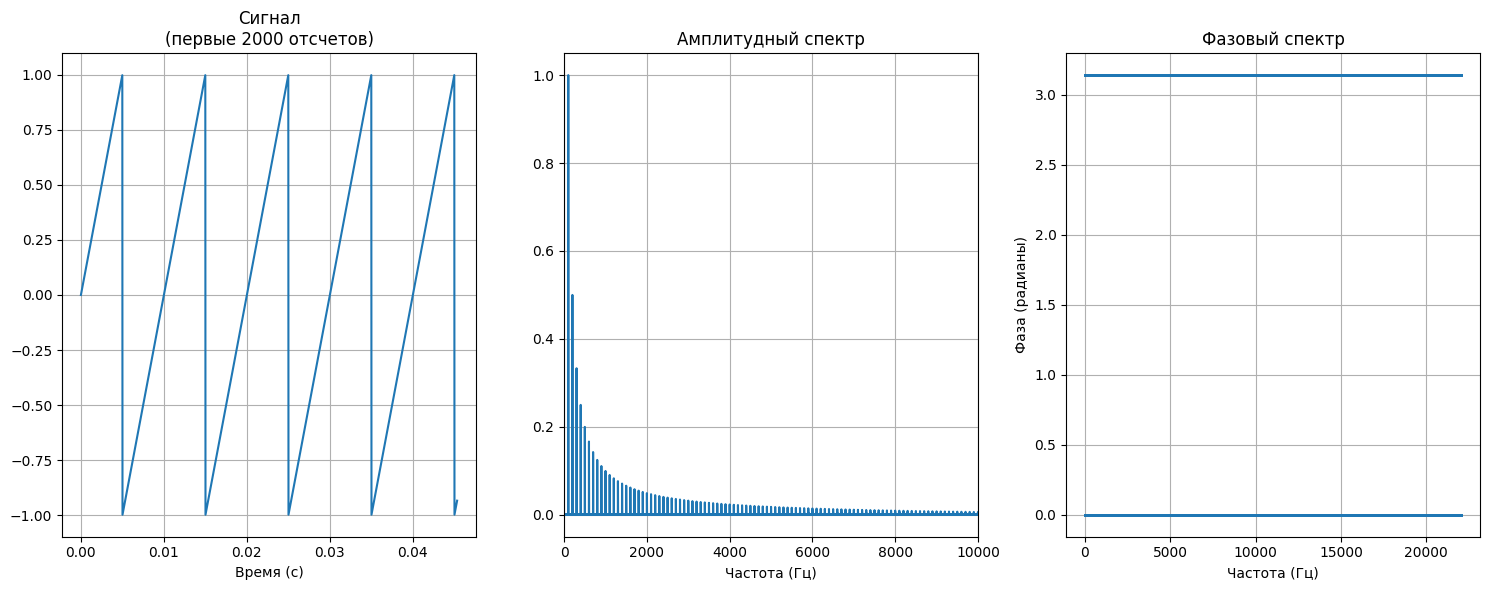

In [11]:
freq, phases, amps = plot_sig_ampl_and_phase_spectrum_with_amplitude_cutoff(
    sig, sample_rate=44100, amplitude_threshold=0
)

Можно видеть, что фаза принимает только два значения - 0 и &pi;. Попробуем привести все фазы к нулю:

In [12]:
def generate_zero_phase_sawtooth_wave(frequency, duration=0.1, sample_rate=44100):
    """
    Создает пилообразный сигнал с нулевыми фазами
    """
    # Генерируем исходный пилообразный сигнал
    t = np.linspace(0, duration, int(sample_rate * duration))
    original_signal = 2 * (t * frequency - np.floor(0.5 + t * frequency))
    
    n = len(original_signal)
    fft_original = fftpack.fft(original_signal)
    
    # Получаем амплитуды и фазы
    amplitudes = np.abs(fft_original)
    phases_original = np.angle(fft_original)
    
    # Обнуляем фазы (оставляем только амплитуды)
    fft_zero_phase = amplitudes * np.exp(0j)  # Все фазы = 0
    
    # Обратное FFT
    zero_phase_signal = np.real(fftpack.ifft(fft_zero_phase))
    
    return t, original_signal, zero_phase_signal, amplitudes, phases_original

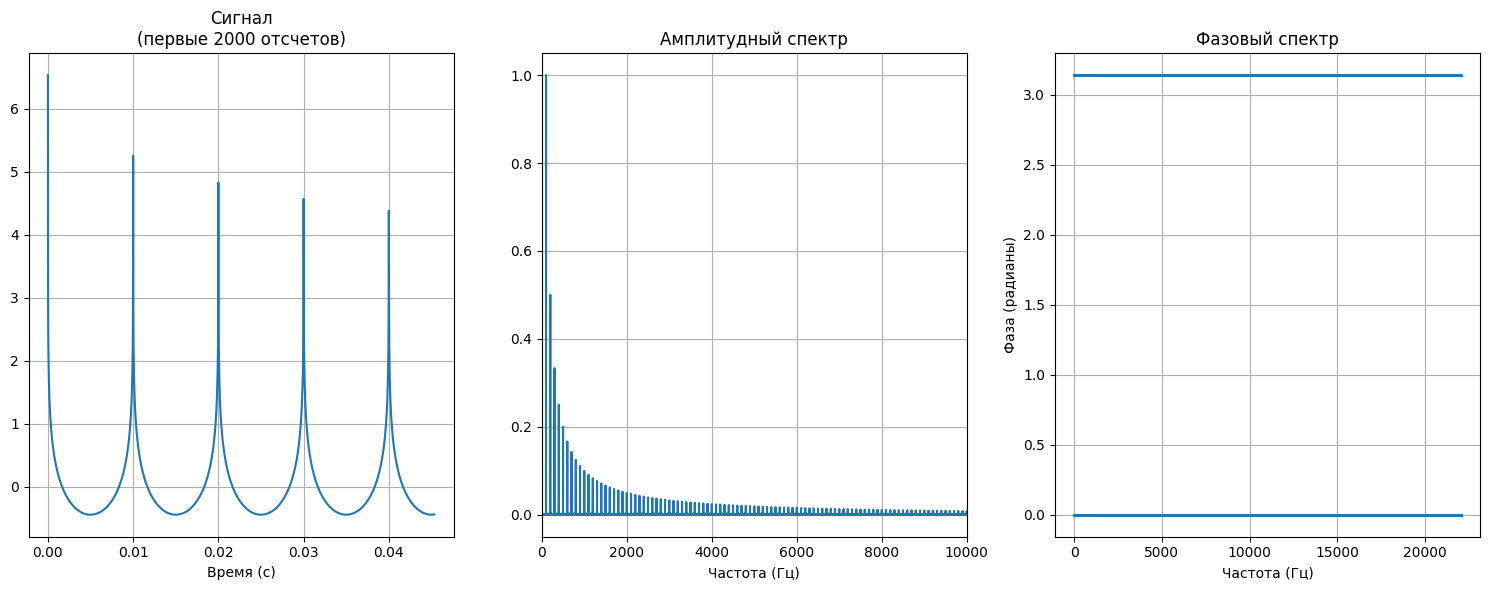

In [13]:
t, original_signal, zero_phase_signal, amplitudes, phases_original = generate_zero_phase_sawtooth_wave(frequency, duration=0.5)

freq, phases, amps = plot_sig_ampl_and_phase_spectrum_with_amplitude_cutoff(
    zero_phase_signal, sample_rate=44100, amplitude_threshold=0
)

На графике ФЧХ видно, что фазы, равные &pi; всё ещё присутствуют. Это произошло, потому что в ДПФ комплексный спектр симметричен, поэтому фазы равные &pi; "восстанавливаются" при ДПФ.

Прослушаем получившийся сигнал:

In [14]:
ipd.Audio(data=zero_phase_signal, rate=44100)

In [15]:
ipd.Audio(data=original_signal, rate=44100)

На слух сигнал звучит аналогично, разница только в амплитуде. Попробуем сгенерировать пилообразный сигнал со случайными фазами:

In [ ]:
def generate_random_phase_sawtooth_wave(frequency, duration=0.1, sample_rate=44100):
    """
    Создает пилообразный сигнал со случайными фазами
    """
    # Генерируем исходный пилообразный сигнал
    t = np.linspace(0, duration, int(sample_rate * duration))
    original_signal = 2 * (t * frequency - np.floor(0.5 + t * frequency))
    
    fft_original = fftpack.fft(original_signal)
    
    # Получаем амплитуды и фазы
    amplitudes = np.abs(fft_original)
    phases_original = np.angle(fft_original)
    
    # Делаем фазы случайными
    random_phases = np.random.uniform(-np.pi, np.pi, len(amplitudes))
    fft_random_phase = amplitudes * np.exp(1j * random_phases)  
    
    # Обратное FFT
    random_phase_signal = np.real(fftpack.ifft(fft_random_phase))
    
    return t, original_signal, random_phase_signal, amplitudes, random_phases, phases_original

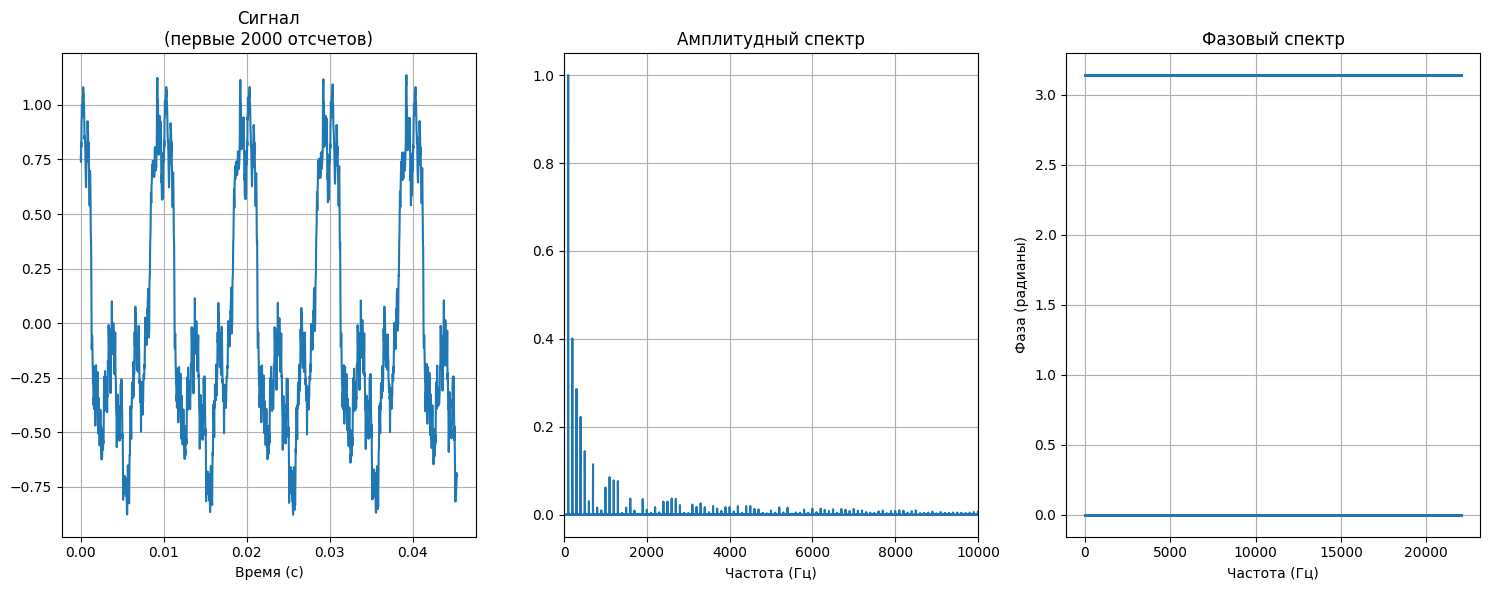

In [17]:
t, original_signal, random_phase_signal, amplitudes, random_phases, phases_original = generate_random_phase_sawtooth_wave(frequency, duration=0.5)

freq, phases, amps = plot_sig_ampl_and_phase_spectrum_with_amplitude_cutoff(
    random_phase_signal, sample_rate=44100, amplitude_threshold=0
)

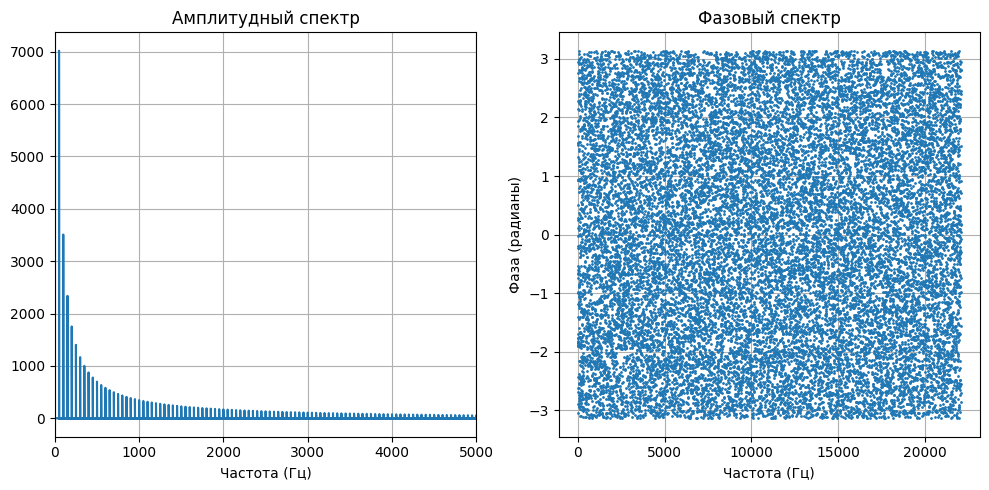

In [18]:
frequencies = fftpack.rfftfreq(len(random_phase_signal), 1/44100)
    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
        
# Амплитудный спектр
ax1.plot(frequencies, amplitudes)
ax1.set_title('Амплитудный спектр')
ax1.set_xlabel('Частота (Гц)')
ax1.set_xlim(0, 5000)  
ax1.grid(True)
        
# Фазовый спектр
ax2.plot(frequencies, random_phases, 'o', 
             markersize=1)
ax2.set_title('Фазовый спектр')
ax2.set_xlabel('Частота (Гц)')
ax2.set_ylabel('Фаза (радианы)')
ax2.grid(True)

plt.tight_layout()
plt.show()

In [19]:
ipd.Audio(data=original_signal, rate=44100)

Рассмотрим фазовый спектр реального сигнала:

In [ ]:
!wget https://github.com/annashell/linear_models/blob/main/saxophone.wav

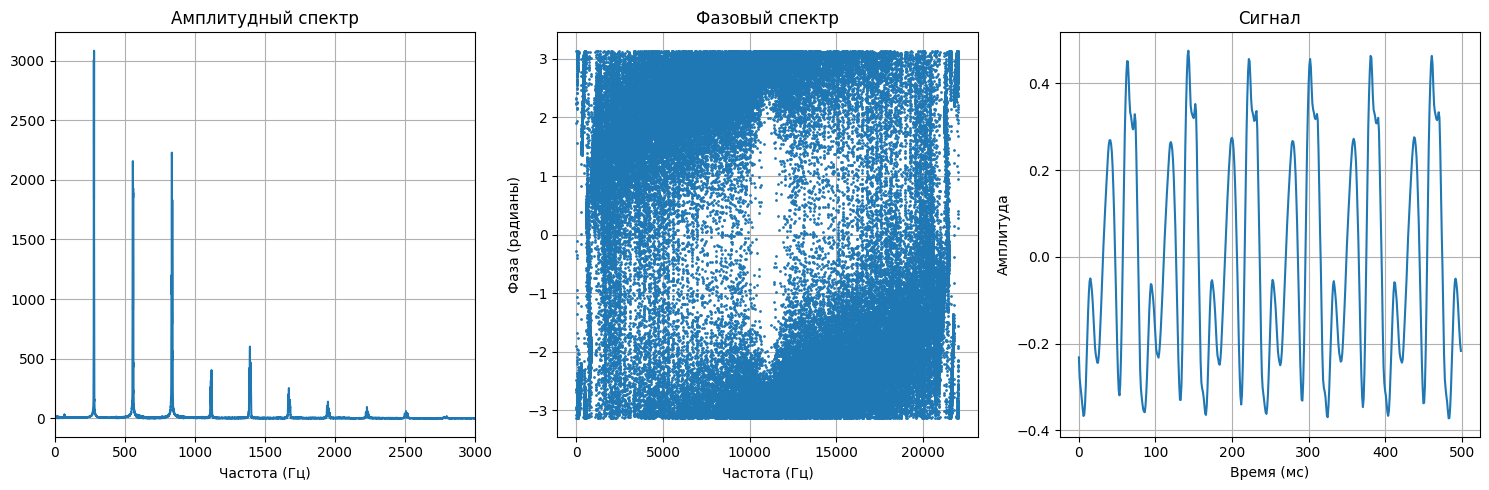

In [40]:
import scipy.io.wavfile as wavfile

sample_rate, data = wavfile.read('saxophone.wav')

# Cтерео, берем только один канал
if len(data.shape) > 1:
    data = data[:, 0]

# Нормализация данных
data = data / np.max(np.abs(data))

# Выбор участка
start_sec = 5.606
end_sec = 7.556
start_sample = int(start_sec * sample_rate)
end_sample = int(end_sec * sample_rate)

segment = data[start_sample:end_sample]

frequencies = fftpack.rfftfreq(len(segment), 1/sample_rate)

fft_original = fftpack.fft(segment)
    
# Получаем амплитуды и фазы
amplitudes = np.abs(fft_original)
phases_original = np.angle(fft_original)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Амплитудный спектр
ax1.plot(frequencies, amplitudes)
ax1.set_title('Амплитудный спектр')
ax1.set_xlabel('Частота (Гц)')
ax1.set_xlim(0, 3000)  
ax1.grid(True)
        
# Фазовый спектр
ax2.plot(frequencies, phases_original, 'o', 
             markersize=1)
ax2.set_title('Фазовый спектр')
ax2.set_xlabel('Частота (Гц)')
ax2.set_ylabel('Фаза (радианы)')
ax2.grid(True)

ax3.plot(segment[:500])
ax3.set_title('Сигнал')
ax3.set_xlabel('Время (мс)')
ax3.set_ylabel('Амплитуда')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [26]:
# Обратное FFT
ifft_segment = np.real(fftpack.ifft(fft_original))

In [28]:
ipd.Audio(data=segment, rate=sample_rate)

In [27]:
ipd.Audio(data=ifft_segment, rate=sample_rate)

Попробуем занулить фазы в реальном сигнале:

In [29]:
    # Обнуляем фазы (оставляем только амплитуды)
    fft_zero_phase = amplitudes * np.exp(0j)  # Все фазы = 0
    zero_phase_signal = np.real(fftpack.ifft(fft_zero_phase))

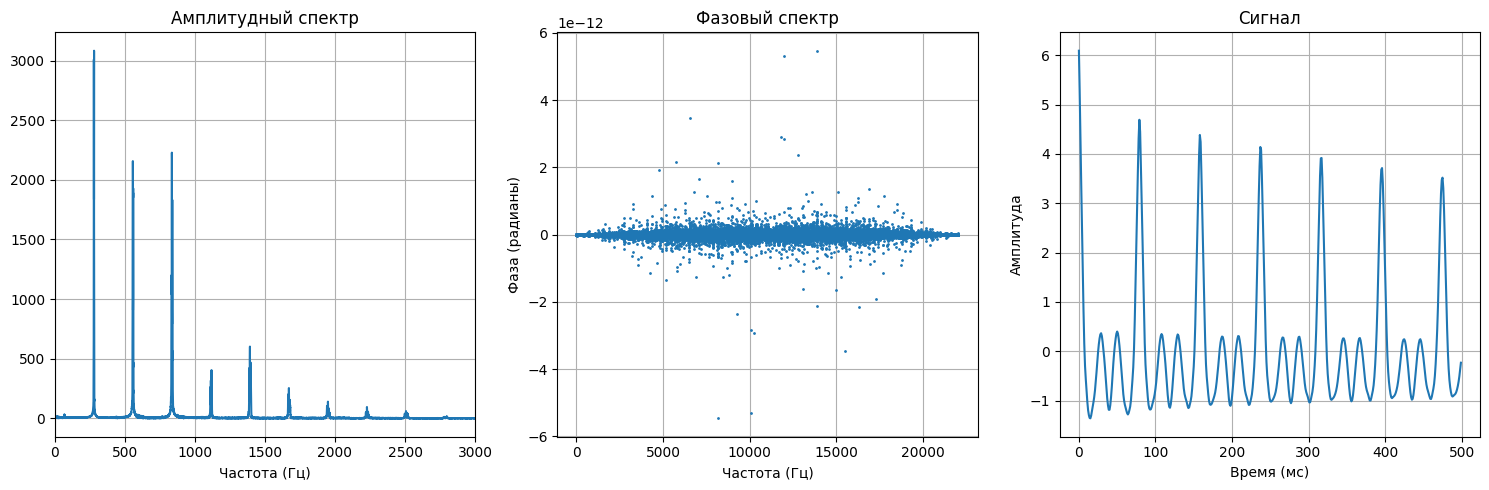

In [41]:
fft_zero_phase = fftpack.fft(zero_phase_signal)

# Получаем амплитуды и фазы
amplitudes = np.abs(fft_zero_phase)
phases_zero_phase = np.angle(fft_zero_phase)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Амплитудный спектр
ax1.plot(frequencies, amplitudes)
ax1.set_title('Амплитудный спектр')
ax1.set_xlabel('Частота (Гц)')
ax1.set_xlim(0, 3000)  
ax1.grid(True)
        
# Фазовый спектр
ax2.plot(frequencies, phases_zero_phase, 'o', 
             markersize=1)
ax2.set_title('Фазовый спектр')
ax2.set_xlabel('Частота (Гц)')
ax2.set_ylabel('Фаза (радианы)')
ax2.grid(True)

ax3.plot(zero_phase_signal[:500])
ax3.set_title('Сигнал')
ax3.set_xlabel('Время (мс)')
ax3.set_ylabel('Амплитуда')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [31]:
# Обратное FFT
ifft_segment_zero_phase = np.real(fftpack.ifft(fft_zero_phase))

ipd.Audio(data=ifft_segment_zero_phase, rate=sample_rate)

Теперь попробуем прибавить к каждой фазе некоторый фиксированный угол (сделать поворот)

In [71]:
offset = 2

fft_original = fftpack.fft(segment)
    
# Получаем амплитуды и фазы
amplitudes = np.abs(fft_original)
phases_original = np.angle(fft_original)

new_phases = phases_original + offset

fft_rotated_phase = amplitudes * np.exp(1j * new_phases)
rotated_phase_signal = np.real(fftpack.ifft(fft_rotated_phase))

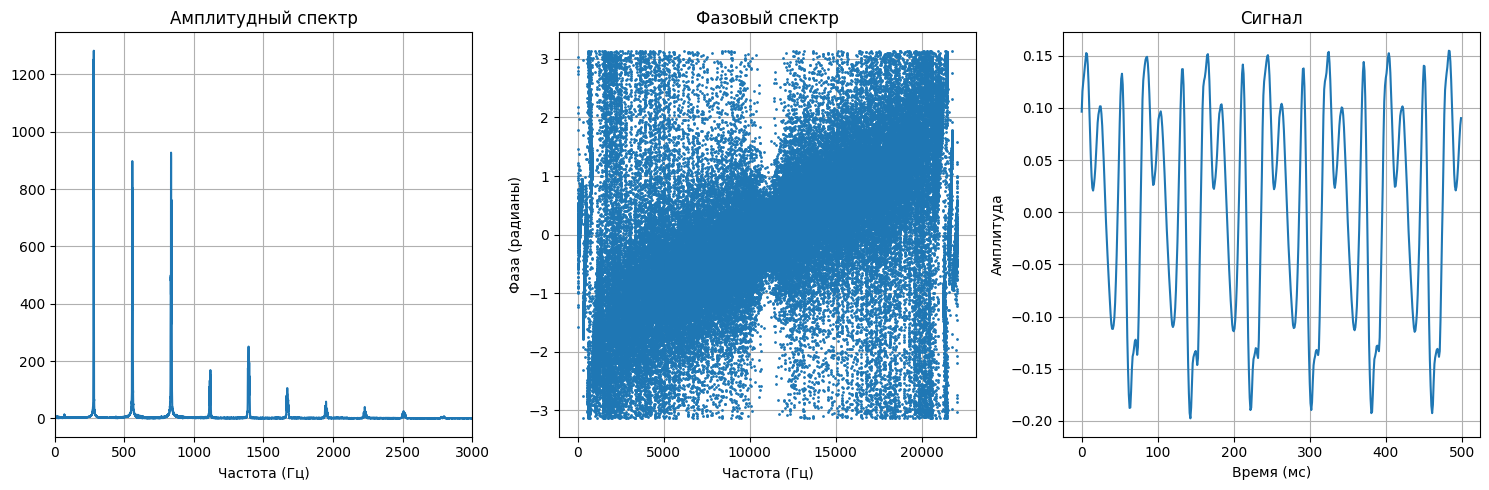

In [72]:
fft_rotated_phase = fftpack.fft(rotated_phase_signal)

# Получаем амплитуды и фазы
amplitudes = np.abs(fft_rotated_phase)
phases_rotated_phase = np.angle(fft_rotated_phase)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Амплитудный спектр
ax1.plot(frequencies, amplitudes)
ax1.set_title('Амплитудный спектр')
ax1.set_xlabel('Частота (Гц)')
ax1.set_xlim(0, 3000)  
ax1.grid(True)
        
# Фазовый спектр
ax2.plot(frequencies, phases_rotated_phase, 'o', 
             markersize=1)
ax2.set_title('Фазовый спектр')
ax2.set_xlabel('Частота (Гц)')
ax2.set_ylabel('Фаза (радианы)')
ax2.grid(True)

ax3.plot(rotated_phase_signal[:500])
ax3.set_title('Сигнал')
ax3.set_xlabel('Время (мс)')
ax3.set_ylabel('Амплитуда')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [73]:
# Обратное FFT
ifft_segment_rotated_phase = np.real(fftpack.ifft(fft_rotated_phase))

ipd.Audio(data=ifft_segment_rotated_phase, rate=sample_rate)

Теперь сделаем фазы случайными:

In [74]:
fft_original = fftpack.fft(segment)
    
# Получаем амплитуды и фазы
amplitudes = np.abs(fft_original)
phases_original = np.angle(fft_original)

new_phases = np.random.uniform(-np.pi, np.pi, len(amplitudes))

fft_random_phase = amplitudes * np.exp(1j * new_phases)
random_phase_signal = np.real(fftpack.ifft(fft_random_phase))

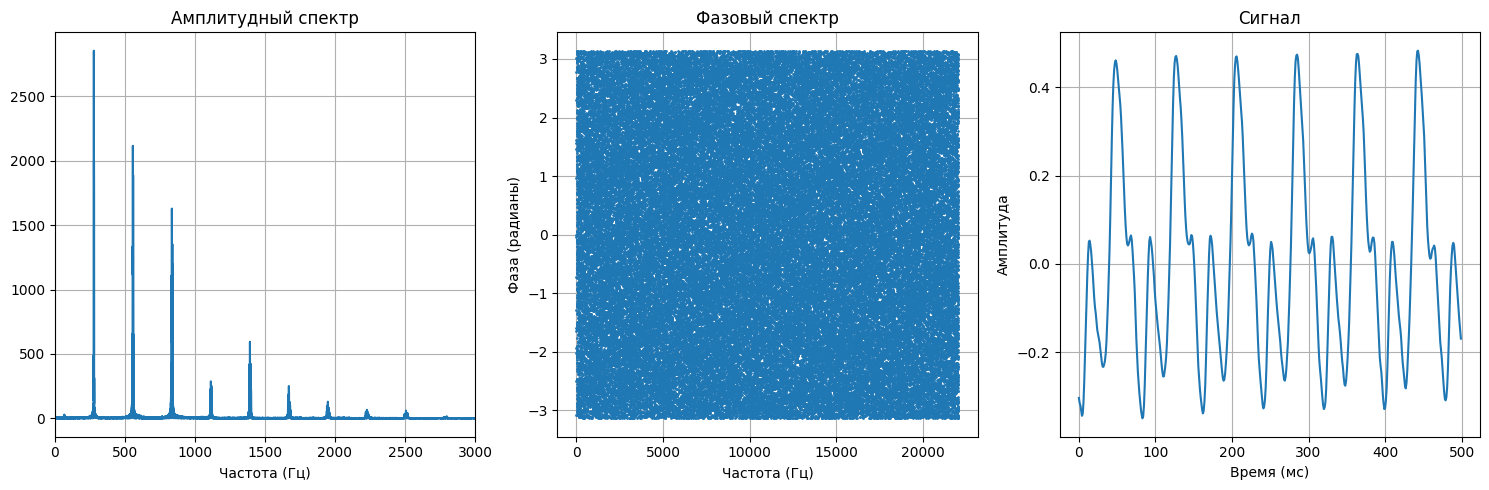

In [75]:
fft_random_phase = fftpack.fft(random_phase_signal)

# Получаем амплитуды и фазы
amplitudes = np.abs(fft_random_phase)
phases_random_phase = np.angle(fft_random_phase)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Амплитудный спектр
ax1.plot(frequencies, amplitudes)
ax1.set_title('Амплитудный спектр')
ax1.set_xlabel('Частота (Гц)')
ax1.set_xlim(0, 3000)  
ax1.grid(True)
        
# Фазовый спектр
ax2.plot(frequencies, phases_random_phase, 'o', 
             markersize=1)
ax2.set_title('Фазовый спектр')
ax2.set_xlabel('Частота (Гц)')
ax2.set_ylabel('Фаза (радианы)')
ax2.grid(True)

ax3.plot(random_phase_signal[:500])
ax3.set_title('Сигнал')
ax3.set_xlabel('Время (мс)')
ax3.set_ylabel('Амплитуда')
ax3.grid(True)

plt.tight_layout()
plt.show()

In [76]:
# Обратное FFT
ifft_segment_random_phase = np.real(fftpack.ifft(fft_random_phase))

ipd.Audio(data=ifft_segment_random_phase, rate=sample_rate)

Задание:
<p>Возьмите гармонический участок речевого сигнала с разметкой границ периодов основного тона. Для каждого периода вычислите FFT. Замените фазы на: </p>
<p> - нули </p>
<p> - старые фазы, повернутые на фиксированный угол </p>
<p> - случайные </p>
<p> - оставьте фазы без изменения </p>
<p> С помощью обратного FFT соберите периоды сигналов обратно, сравните результаты. </p>